In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import starfm
import parameters
from scipy.signal import convolve2d

In [2]:
F0 = cv2.imread("../Images/sim_Landsat_t1.tif")
C0 = cv2.imread("../Images/sim_MODIS_t1.tif")
C1 = cv2.imread("../Images/sim_MODIS_t2.tif")

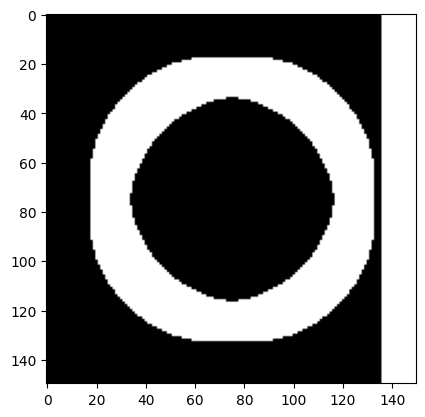

In [3]:
F1 = starfm.prediction(F0, C0, C1)

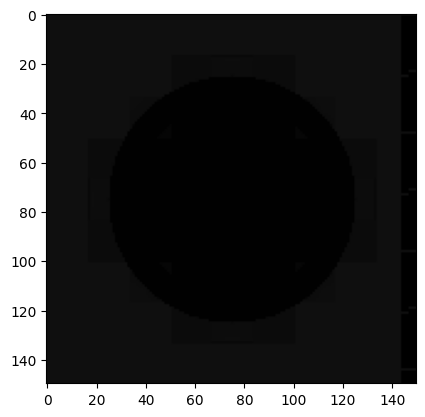

In [4]:
plt.imshow(F1, cmap='gray')
plt.show()

In [81]:
def sobel_edge_detection(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    mag = np.sqrt(sobelx**2 + sobely**2)
    mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    thresh = cv2.threshold(mag, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    # define a 5x5 kernel of ones
    kernel = np.ones((5, 5))

    # perform the convolution operation with the kernel
    output = convolve2d(thresh, kernel, mode='same')

    # threshold the output to set any non-zero values to 1
    output[output > 0] = 1
    return output


In [82]:
edge_image = sobel_edge_detection(F0)

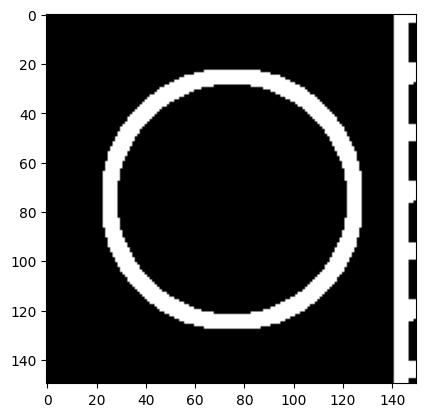

In [83]:
plt.imshow(edge_image, cmap='gray')
plt.show()

In [20]:
def padImage(image):
    padded_image = np.pad(
        image, pad_width=parameters.windowSize // 2, mode="constant", constant_values=0
    )
    return padded_image

In [21]:
padded_F0 = padImage(F0)

In [24]:
F0.shape

(150, 150, 3)

In [25]:
padded_F0.shape

(180, 180, 33)

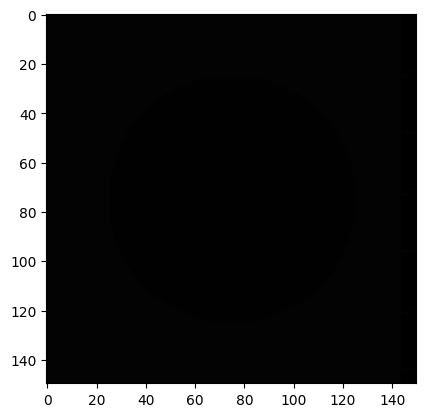

In [23]:
plt.imshow(F0, cmap='gray')
plt.show()